# Sheet 5

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## 2 Trees and Random Forests
(a)

gini impurity -1.1932732216796555
misclassification rate -1.1932732216796555
entropy -1.1932732216796555


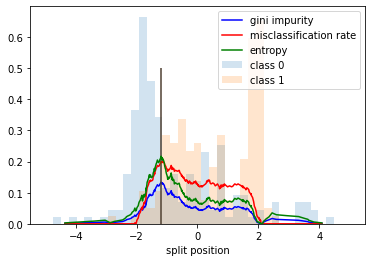

In [4]:
from collections import defaultdict

# load the data
pts = np.load('data02/data1d.npy')
labels = np.load('data02/labels1d.npy')

# TODO: Sort the points to easily split them
order = np.argsort(pts)
pts = pts[order]
labels = labels[order]

# np.random.shuffle(labels) # uncomment to see criterions make different splits for random labels

# TODO: Implement or find implementation for Gini impurity, entropy and misclassifcation rate

def entropy(prob):
    prob = prob[prob!=0] # mask away zeros
    return np.sum(-prob * np.log2(prob))

def gini(prob):
    return 1 - (prob ** 2).sum()

def misclassification(prob):
    return 1 - np.max(prob)

def probabilities(partition):
    # divide counts by size of dataset to get cluster probabilites
    return np.unique(partition, return_counts=True)[1] / len(partition)

def compute_split_measure(l, l0, l1, method):
    p0 = probabilities(l0)
    p1 = probabilities(l1)
    p = probabilities(l)
    return method(p) - (len(l0) * method(p0) + len(l1) * method(p1)) / (len(l))

# TODO: Iterate over the possible splits, evaulating and saving the three criteria for each one
split_measures = {'gini impurity': [], 'misclassification rate': [], 'entropy': []}

for i in range(1, len(pts)):
    l0, l1 = labels[:i], labels[i:]
    split_measures['gini impurity'].append(compute_split_measure(labels, l0, l1, method=gini))
    split_measures['misclassification rate'].append(compute_split_measure(labels, l0, l1, method=misclassification))
    split_measures['entropy'].append(compute_split_measure(labels, l0, l1, method=entropy))
    
# TODO: Compute the split that each criterion favours and visualize them 
#       (e.g. with a histogram for each class and vertical lines to show the splits)

splitpoints = (pts[1:] + pts[:-1]) / 2

for (measure, vals), color in zip(split_measures.items(), ['b', 'r', 'g']):
    vals = np.array(vals)
    plt.plot(splitpoints, vals, label=measure, c=color)
    best_split_pos = splitpoints[np.argmax(vals)]
    print(measure, best_split_pos)
    plt.vlines([best_split_pos], 0, 0.5, color=color, alpha=0.5)

bins = np.linspace(-5, 5, 40)
plt.hist(pts[labels==0], density=True, alpha=0.2, bins=bins, label='class 0')
plt.hist(pts[labels==1], density=True, alpha=0.2, bins=bins, label='class 1')

plt.legend(loc='upper right')
plt.xlabel('split position')
plt.show()

(b)

In [7]:
# load the dijet data
features = np.load('data02/dijet_features_normalized.npy')
labels = np.load('data02/dijet_labels.npy')

# TODO: define train, val and test splits as specified (make sure to shuffle the data before splitting it!)
order = np.arange(len(labels))
np.random.seed(0)
np.random.shuffle(order)
features = features[:, order]
labels = labels[order]

train_features, val_features, test_features = features[:, :-400], features[:, -400:-200], features[:, -200:]
train_labels, val_labels, test_labels = labels[:-400], labels[-400:-200], labels[-200:]

In [8]:
from sklearn.ensemble import RandomForestClassifier

# TODO: train a random forest classifier for each combination of specified hyperparameters 
#       and evaluate the performances on the validation set.

def acc(pred, labels):
    return (pred==labels).mean()

hparams = []
scores = []
predictors = []
for n_estimators in [5, 10, 20, 100]:
    for criterion in ['gini', 'entropy']:
        for max_depth in [1, 2, 5, 10, None]:
            kwargs = dict(
                n_estimators=n_estimators, 
                criterion=criterion,
                max_depth=max_depth,
            )
            predictor = RandomForestClassifier(
                **kwargs
            )
            predictor.fit(train_features.T, train_labels)
            val_pred = predictor.predict(val_features.T)
            hparams.append(kwargs)
            predictors.append(predictor)
            scores.append(acc(val_pred, val_labels))
            print(f"{acc(val_pred, val_labels)=:.2f}, {kwargs}")

acc(val_pred, val_labels)=0.59, {'n_estimators': 5, 'criterion': 'gini', 'max_depth': 1}
acc(val_pred, val_labels)=0.67, {'n_estimators': 5, 'criterion': 'gini', 'max_depth': 2}
acc(val_pred, val_labels)=0.71, {'n_estimators': 5, 'criterion': 'gini', 'max_depth': 5}
acc(val_pred, val_labels)=0.68, {'n_estimators': 5, 'criterion': 'gini', 'max_depth': 10}
acc(val_pred, val_labels)=0.66, {'n_estimators': 5, 'criterion': 'gini', 'max_depth': None}
acc(val_pred, val_labels)=0.59, {'n_estimators': 5, 'criterion': 'entropy', 'max_depth': 1}
acc(val_pred, val_labels)=0.67, {'n_estimators': 5, 'criterion': 'entropy', 'max_depth': 2}
acc(val_pred, val_labels)=0.74, {'n_estimators': 5, 'criterion': 'entropy', 'max_depth': 5}
acc(val_pred, val_labels)=0.72, {'n_estimators': 5, 'criterion': 'entropy', 'max_depth': 10}
acc(val_pred, val_labels)=0.69, {'n_estimators': 5, 'criterion': 'entropy', 'max_depth': None}
acc(val_pred, val_labels)=0.59, {'n_estimators': 10, 'criterion': 'gini', 'max_depth': 

In [11]:
# TODO: for your preferred configuration, evaluate the performance of the best configuration on the test set
i = np.argmax(scores)
print(hparams[i])
print('validation score:', scores[i])

new_predictor = RandomForestClassifier(**hparams[i])
# new_predictor.fit(train_features.T, train_labels)

acc(predictors[i].predict(test_features.T), test_labels)#, acc(new_predictor.predict(test_features.T), test_labels)

{'n_estimators': 100, 'criterion': 'gini', 'max_depth': 10}
validation score: 0.79


0.79

# 3) Fits

In [269]:
def gas_ideal(Vm, R, T, sigma=0):
    p = R*T / Vm
    p += np.random.randn(*Vm.shape) * sigma
    return p
def gas_real(Vm, a, b, R, T, sigma=0):
    p = R*T / (Vm - b) - a/Vm**2
    p += np.random.randn(*Vm.shape) * sigma
    return p

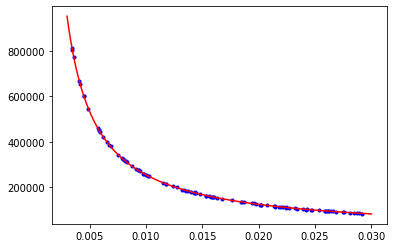

In [270]:
# Generate data (students don't do this)
N = 100
T = 293
R = 8.3144626
a = 0.2
b = 5e-4 #36.4e-6

Vm_min, Vm_max = 3e-3, 30e-3
data_Vm = np.random.rand(N) * (Vm_max-Vm_min) + Vm_min
data_p = gas_real(data_Vm, a, b, R, T, sigma=1000)
data = np.stack([data_Vm, data_p], axis=0)
np.save("data02/gas.npy", data)

test_Vm = np.linspace(Vm_min, Vm_max, 1000)
plt.plot(data_Vm, data_p,"b.")
plt.plot(test_Vm, gas_real(test_Vm, a, b, R, T), "r-")
plt.show()

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 119173189.40090422
             x: [ 9.020e+00]
           nit: 29
          nfev: 58
 final_simplex: (array([[ 9.020e+00],
                       [ 9.020e+00]]), array([ 1.192e+08,  1.192e+08]))
Fit results: 119173189.40090422 [9.02015686]


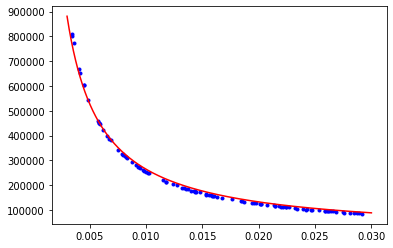

In [275]:
from scipy.optimize import minimize

data_Vm, data_p = np.load("data02/gas.npy")
T = 293

def MSE(R):
    p0 = gas_ideal(data_Vm,R,T)
    MSE = np.mean( (p0-data_p)**2)
    return MSE

res=minimize(MSE, x0=[1.], method="Nelder-Mead")
print(res)
print(f"Fit results: {res.fun} {res.x}")
R = res.x[0]

fit_p = gas_ideal(test_Vm, R, T)

plt.plot(data_Vm,data_p,"b.")
plt.plot(test_Vm,fit_p,"r-")
plt.show()

Fit results: 27326382.853022676 [4.23174752e+00 1.19571395e-03]


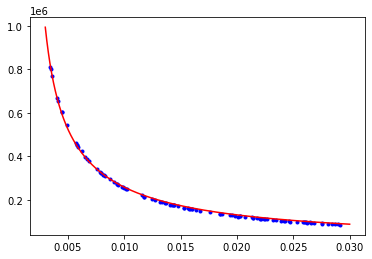

In [274]:
def MSE(args):
    a, b = args
    p0 = gas_real(data_Vm,a,b,R,T)
    MSE = np.mean( (p0-data_p)**2)
    return MSE

res=minimize(MSE, x0=[0.,0.], method="Nelder-Mead")
print(f"Fit results: {res.fun} {res.x}")

fit_p = gas_real(test_Vm, *res.x, R, T)

plt.plot(data_Vm,data_p,"b.")
plt.plot(test_Vm,fit_p,"r-")
plt.show()